<a href="https://colab.research.google.com/github/micsupasun/university_of_essex/blob/main/text_analytics/assignment_2/machine_learning_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT LIBRARY

In [ ]:
pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 89 kB 3.8 MB/s 


In [ ]:
# import library
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from textblob import TextBlob
from sklearn.pipeline import Pipeline
import nltk
import re
# clean data
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
# model
from scipy import sparse
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

# cnn
from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D
from sklearn.metrics import f1_score
from keras.layers import Dense, Activation, Dropout, BatchNormalization,Embedding
from sklearn.metrics import f1_score, make_scorer, hamming_loss, accuracy_score
from sklearn.linear_model import LogisticRegression

# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# IMPORT FILE ECONBIZ

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# data preprocessing
df = pd.read_csv('/content/gdrive/MyDrive/essex_university/Text_Analytics/assignment_2/dataset/econbiz.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064634 entries, 0 to 1064633
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   id      1064634 non-null  int64 
 1   title   1064634 non-null  object
 2   labels  1064634 non-null  object
 3   fold    1064634 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 32.5+ MB


,id,title,labels,fold
0,10000168395,Water insecurity and the poor : issues and res...,18377-5\t18378-3\t18232-3\t10488-1\t10492-3,6
1,10000168396,Crop biotechnology in developing countries : a...,18317-2\t16696-6\t11529-1\t10492-3,8
2,10000338739,"Medicaid, intergovernmental trends and options",13415-6\t19507-6\t19517-3\t11600-0\t17829-1,8
3,10000413084,State solvency regulation of property-casualty...,13297-0\t13294-6\t13818-5\t12228-3\t10894-4\t1...,2
4,10000549504,Tax and expenditure limits on local governments,11553-4\t11653-0\t11539-5\t11731-6\t17829-1,8
...,...,...,...,...
1064629,10011648325,Keadaan angkatan kerja di Indonesia : angka se...,11271-0\t11272-5\t17578-0,10
1064630,10011648452,Statistical abstract,17678-3\t19072-1,10
1064631,10011649317,Review of economic studies and research Virgil...,10032-2\t12041-5\t17177-4\t16809-5,10
1064632,10011650217,Review of capital as power,11046-0\t10032-2\t10037-6,10


In [ ]:
# use 1000 record and delete fold column
df = df[:1000]
df = df.loc[:, ['id','title','labels']]
df

,id,title,labels
0,10000168395,Water insecurity and the poor : issues and res...,18377-5\t18378-3\t18232-3\t10488-1\t10492-3
1,10000168396,Crop biotechnology in developing countries : a...,18317-2\t16696-6\t11529-1\t10492-3
2,10000338739,"Medicaid, intergovernmental trends and options",13415-6\t19507-6\t19517-3\t11600-0\t17829-1
3,10000413084,State solvency regulation of property-casualty...,13297-0\t13294-6\t13818-5\t12228-3\t10894-4\t1...
4,10000549504,Tax and expenditure limits on local governments,11553-4\t11653-0\t11539-5\t11731-6\t17829-1
...,...,...,...
995,10001470415,Dropout and enrollment trends in the post-war ...,18860-2\t11373-6\t11222-6\t19073-6\t17829-1
996,10001470418,Why do the poor live in cities?,19474-2\t19453-3\t11990-3\t10171-2\t11994-2\t1...
997,10001470461,Employment patterns in OECD countries,11183-4\t19208-2\t11235-4\t19502-2\t11266-0\t1...
998,10001470565,Local instrumental variables,19073-6\t15365-6


## Capital to small

In [ ]:
# transform capital to small
df['title'] = df['title'].map(lambda x : x.lower())
df

,id,title,labels
0,10000168395,water insecurity and the poor : issues and res...,18377-5\t18378-3\t18232-3\t10488-1\t10492-3
1,10000168396,crop biotechnology in developing countries : a...,18317-2\t16696-6\t11529-1\t10492-3
2,10000338739,"medicaid, intergovernmental trends and options",13415-6\t19507-6\t19517-3\t11600-0\t17829-1
3,10000413084,state solvency regulation of property-casualty...,13297-0\t13294-6\t13818-5\t12228-3\t10894-4\t1...
4,10000549504,tax and expenditure limits on local governments,11553-4\t11653-0\t11539-5\t11731-6\t17829-1
...,...,...,...
995,10001470415,dropout and enrollment trends in the post-war ...,18860-2\t11373-6\t11222-6\t19073-6\t17829-1
996,10001470418,why do the poor live in cities?,19474-2\t19453-3\t11990-3\t10171-2\t11994-2\t1...
997,10001470461,employment patterns in oecd countries,11183-4\t19208-2\t11235-4\t19502-2\t11266-0\t1...
998,10001470565,local instrumental variables,19073-6\t15365-6


## Stop word

delete useless word in,the,a,is,for

In [ ]:
english_stop_word = set(stopwords.words('english'))
df['title'] = df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (english_stop_word)]))
df


,id,title,labels
0,10000168395,water insecurity poor : issues research needs,18377-5\t18378-3\t18232-3\t10488-1\t10492-3
1,10000168396,crop biotechnology developing countries : conc...,18317-2\t16696-6\t11529-1\t10492-3
2,10000338739,"medicaid, intergovernmental trends options",13415-6\t19507-6\t19517-3\t11600-0\t17829-1
3,10000413084,state solvency regulation property-casualty li...,13297-0\t13294-6\t13818-5\t12228-3\t10894-4\t1...
4,10000549504,tax expenditure limits local governments,11553-4\t11653-0\t11539-5\t11731-6\t17829-1
...,...,...,...
995,10001470415,dropout enrollment trends post-war period : we...,18860-2\t11373-6\t11222-6\t19073-6\t17829-1
996,10001470418,poor live cities?,19474-2\t19453-3\t11990-3\t10171-2\t11994-2\t1...
997,10001470461,employment patterns oecd countries,11183-4\t19208-2\t11235-4\t19502-2\t11266-0\t1...
998,10001470565,local instrumental variables,19073-6\t15365-6


## Lemmatization

In [ ]:
# tranform Lemmatization. which is the process of converting a word with a list of words in a dictionary, proper grammatical analysis of the language to transform and conjugate words to eliminate inflection of words 
# such as gender, tense, sound, mood, number, etc. Most will cut the footer. Leave only the basic form, which is a word in the dictionary called Lemma. For example, saw with Stemming works best with s, but with Lemmatization can work see or saw, depending on whether it is a Noun or Verb.
#  After that we will do Stemming. It cuts the end of the word coarsely with a simple pattern, which works quite well. For most, but not all, English words, stemming reduces form. 
df['title'] = df['title'].apply(lambda x: " ". join([w.lemmatize() for w in TextBlob(x).words]))
df

,id,title,labels
0,10000168395,water insecurity poor issue research need,18377-5\t18378-3\t18232-3\t10488-1\t10492-3
1,10000168396,crop biotechnology developing country conceptu...,18317-2\t16696-6\t11529-1\t10492-3
2,10000338739,medicaid intergovernmental trend option,13415-6\t19507-6\t19517-3\t11600-0\t17829-1
3,10000413084,state solvency regulation property-casualty li...,13297-0\t13294-6\t13818-5\t12228-3\t10894-4\t1...
4,10000549504,tax expenditure limit local government,11553-4\t11653-0\t11539-5\t11731-6\t17829-1
...,...,...,...
995,10001470415,dropout enrollment trend post-war period went ...,18860-2\t11373-6\t11222-6\t19073-6\t17829-1
996,10001470418,poor live city,19474-2\t19453-3\t11990-3\t10171-2\t11994-2\t1...
997,10001470461,employment pattern oecd country,11183-4\t19208-2\t11235-4\t19502-2\t11266-0\t1...
998,10001470565,local instrumental variable,19073-6\t15365-6


## stem

fix same mean such as good better best

In [ ]:
stem_english = SnowballStemmer("english")
df['title'] = df['title'].apply(lambda x: stem_english.stem(x)) # Stem every word.
df

,id,title,labels
0,10000168395,water insecurity poor issue research ne,18377-5\t18378-3\t18232-3\t10488-1\t10492-3
1,10000168396,crop biotechnology developing country conceptu...,18317-2\t16696-6\t11529-1\t10492-3
2,10000338739,medicaid intergovernmental trend opt,13415-6\t19507-6\t19517-3\t11600-0\t17829-1
3,10000413084,state solvency regulation property-casualty li...,13297-0\t13294-6\t13818-5\t12228-3\t10894-4\t1...
4,10000549504,tax expenditure limit local govern,11553-4\t11653-0\t11539-5\t11731-6\t17829-1
...,...,...,...
995,10001470415,dropout enrollment trend post-war period went ...,18860-2\t11373-6\t11222-6\t19073-6\t17829-1
996,10001470418,poor live c,19474-2\t19453-3\t11990-3\t10171-2\t11994-2\t1...
997,10001470461,employment pattern oecd countri,11183-4\t19208-2\t11235-4\t19502-2\t11266-0\t1...
998,10001470565,local instrumental vari,19073-6\t15365-6


## regular expression

In [ ]:
# df['title'] = df['title'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x)) #Removes numbers
# df['title'] = df['title'].apply(lambda x: re.sub('\s+[a-zA-Z]\s+', ' ', x)) # Removes single characters
# df['title'] = df['title'].apply(lambda x: re.sub('\s+', ' ', x)) # Removes multiple spaces
# df

## word tokenize

In [ ]:
# df['title'] = df['title'].apply(lambda x: word_tokenize(x)) #Tokenize the title sample for checking stopwords
# df

## Clean label

In [ ]:
# clean label
df['labels'] = df['labels'].map(lambda x : x.split('\t'))
df

,id,title,labels
0,10000168395,water insecurity poor issue research ne,"[18377-5, 18378-3, 18232-3, 10488-1, 10492-3]"
1,10000168396,crop biotechnology developing country conceptu...,"[18317-2, 16696-6, 11529-1, 10492-3]"
2,10000338739,medicaid intergovernmental trend opt,"[13415-6, 19507-6, 19517-3, 11600-0, 17829-1]"
3,10000413084,state solvency regulation property-casualty li...,"[13297-0, 13294-6, 13818-5, 12228-3, 10894-4, ..."
4,10000549504,tax expenditure limit local govern,"[11553-4, 11653-0, 11539-5, 11731-6, 17829-1]"
...,...,...,...
995,10001470415,dropout enrollment trend post-war period went ...,"[18860-2, 11373-6, 11222-6, 19073-6, 17829-1]"
996,10001470418,poor live c,"[19474-2, 19453-3, 11990-3, 10171-2, 11994-2, ..."
997,10001470461,employment pattern oecd countri,"[11183-4, 19208-2, 11235-4, 19502-2, 11266-0, ..."
998,10001470565,local instrumental vari,"[19073-6, 15365-6]"


In [ ]:
# clean label 
df['labels'] = df['labels'].map(lambda x : ' '.join(x))

In [ ]:
df

,id,title,labels
0,10000168395,water insecurity poor issue research ne,18377-5 18378-3 18232-3 10488-1 10492-3
1,10000168396,crop biotechnology developing country conceptu...,18317-2 16696-6 11529-1 10492-3
2,10000338739,medicaid intergovernmental trend opt,13415-6 19507-6 19517-3 11600-0 17829-1
3,10000413084,state solvency regulation property-casualty li...,13297-0 13294-6 13818-5 12228-3 10894-4 17829-1
4,10000549504,tax expenditure limit local govern,11553-4 11653-0 11539-5 11731-6 17829-1
...,...,...,...
995,10001470415,dropout enrollment trend post-war period went ...,18860-2 11373-6 11222-6 19073-6 17829-1
996,10001470418,poor live c,19474-2 19453-3 11990-3 10171-2 11994-2 11629-...
997,10001470461,employment pattern oecd countri,11183-4 19208-2 11235-4 19502-2 11266-0 11284-...
998,10001470565,local instrumental vari,19073-6 15365-6


In [ ]:
# clean label to numpy
labels = df['labels'].values
labels = [[l for l in clean.split()] for clean in labels]
type(labels)

list

In [ ]:
labels

[['18377-5', '18378-3', '18232-3', '10488-1', '10492-3'],
 ['18317-2', '16696-6', '11529-1', '10492-3'],
 ['13415-6', '19507-6', '19517-3', '11600-0', '17829-1'],
 ['13297-0', '13294-6', '13818-5', '12228-3', '10894-4', '17829-1'],
 ['11553-4', '11653-0', '11539-5', '11731-6', '17829-1'],
 ['16709-2', '11812-6', '10437-4', '15635-3', '18325-3', '17983-5'],
 ['12072-1', '10065-1', '10145-3', '16745-5', '17374-2'],
 ['10894-4', '11154-4', '16336-1', '17829-1'],
 ['18085-4', '18810-3', '13687-1', '17374-2'],
 ['18879-2', '17829-1'],
 ['19335-2',
  '11728-2',
  '11586-3',
  '19037-3',
  '17993-2',
  '19336-0',
  '19354-5',
  '17983-5'],
 ['11313-3', '11127-0', '17181-6', '16826-5', '17175-1', '17461-0', '17177-4'],
 ['13325-0', '17983-5'],
 ['10414-2', '10342-1', '10987-4', '17829-1'],
 ['15076-6', '15064-6', '18161-0', '17829-1', '15115-1'],
 ['12945-3', '10169-3', '10440-1', '11127-0', '19077-5'],
 ['11809-2', '10979-3', '17171-2'],
 ['18330-3', '16982-5'],
 ['11184-2', '19208-2', '19044

## MultiLabelBinarizer

In [ ]:
# one hot encoding label
multilabel_binarizer = MultiLabelBinarizer(sparse_output=True)
multilabel_binarizer.fit(labels)
# labels = multilabel_binarizer.classes_
y = multilabel_binarizer.transform(labels)
y

<1000x1331 sparse matrix of type '<class 'numpy.int64'>'
	with 5345 stored elements in Compressed Sparse Row format>

In [ ]:
# show all of label unique
multilabel_binarizer.classes_

array(['10001-6', '10006-3', '10008-6', ..., '30089-3', '30104-5',
       '30107-6'], dtype=object)

In [ ]:
# X = df['title'].tolist()
X = df['title']
X

0                water insecurity poor issue research ne
1      crop biotechnology developing country conceptu...
2                   medicaid intergovernmental trend opt
3      state solvency regulation property-casualty li...
4                     tax expenditure limit local govern
                             ...                        
995    dropout enrollment trend post-war period went ...
996                                          poor live c
997                      employment pattern oecd countri
998                              local instrumental vari
999    long take united state become optimal currency...
Name: title, Length: 1000, dtype: object

## train test split

In [ ]:
# train test split for protect overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23)
type(X_train), type(X_test), type(y_train), type(y_test)

(pandas.core.series.Series,
 pandas.core.series.Series,
 scipy.sparse.csr.csr_matrix,
 scipy.sparse.csr.csr_matrix)

In [ ]:
X_train.shape,y_train.shape

((900,), (900, 1331))

In [ ]:
X_train

250       extent consequence downward nominal wage rigid
491              dynamic model inflation kenya 1974 1996
210    labor supply effect social security earnings test
874    determinanten regionaler unterschiede der grün...
968    multinationality matter evidence value destruc...
                             ...                        
950                                    determinant trust
969    purchasing power parity three stake heart unit...
40     impact monetary instrument shock absorption eu...
742                         social capital rural denmark
595    choice organizational form gasoline retailing ...
Name: title, Length: 900, dtype: object

## MACHINE LEARNING MODEL

### LogisticRegression

In [ ]:
# pipeline
clf = Pipeline([("vectorizer", TfidfVectorizer(max_features = 25000)), ("classifier", OneVsRestClassifier(LogisticRegression(), n_jobs = 4))])


clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

accuracy 0.12312842712842713 percent
Hamming loss: 0.00391435011269722


In [ ]:
# pipeline
clf = Pipeline([("vectorizer", TfidfVectorizer(max_features = 25000)), ("classifier", LabelPowerset(LogisticRegression()))])


clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

accuracy 0.1435949605949606 percent
Hamming loss: 0.0053418482344102175


### Random Forest

In [ ]:
# pipeline
clf = Pipeline([("vectorizer", TfidfVectorizer(max_features = 25000)),
                ('classifier', OneVsRestClassifier(RandomForestClassifier(n_estimators= 100))),
               ])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 42 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 79 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 94 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 95 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 111 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/pyth

accuracy 0.12938239538239538 percent
Hamming loss: 0.00391435011269722


In [ ]:
# pipeline
clf = Pipeline([("vectorizer", TfidfVectorizer(max_features = 25000)),
                ('classifier', OneVsRestClassifier(RandomForestClassifier(n_estimators= 400))),
               ])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 42 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 79 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 94 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 95 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 111 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/pyth

accuracy 0.13143795093795094 percent
Hamming loss: 0.003929376408715252


### NAIVE BAYES

In [ ]:
# pipeline
clf = Pipeline([("vectorizer", TfidfVectorizer(max_features = 25000)), ("classifier", LabelPowerset(GaussianNB()))])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

accuracy 0.16174615580497936 percent
Hamming loss: 0.005379413974455296


In [ ]:
# pipeline
clf = Pipeline([("vectorizer",
                 TfidfVectorizer(max_features = 25000)), 
                ("classifier", OneVsRestClassifier(ComplementNB()))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 42 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 79 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 94 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 95 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 111 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/pyth

accuracy 0.22765363603789024 percent
Hamming loss: 0.05260706235912847


### DecisionTreeClassifier

In [ ]:
# pipeline
clf = Pipeline([("vectorizer",
                 TfidfVectorizer(max_features = 25000)), 
                ("classifier", OneVsRestClassifier(DecisionTreeClassifier()))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 42 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 79 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 94 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 95 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 111 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/pyth

accuracy 0.22568605250958196 percent
Hamming loss: 0.006371149511645379


### KNeighborsClassifier

In [ ]:
# pipeline
clf = Pipeline([("vectorizer",
                 TfidfVectorizer(max_features = 25000)), 
                ("classifier", OneVsRestClassifier(KNeighborsClassifier()))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 42 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 79 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 94 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 95 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 111 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/pyth

accuracy 0.20132683982683983 percent
Hamming loss: 0.0038617580766341095


### SVC

In [ ]:
# pipeline
clf = Pipeline([("vectorizer",
                 TfidfVectorizer(max_features = 25000)), 
                ("classifier", OneVsRestClassifier(SVC()))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 42 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 79 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 94 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 95 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 111 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/pyth

accuracy 0.13054906204906205 percent
Hamming loss: 0.003884297520661157


### XGBClassifier

In [ ]:
# pipeline
clf = Pipeline([("vectorizer",
                 TfidfVectorizer(max_features = 25000)), 
                ("classifier", OneVsRestClassifier(XGBClassifier()))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 42 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 79 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 94 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 95 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 111 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/pyth

accuracy 0.20802713952713955 percent
Hamming loss: 0.003996994740796394


### SGDClassifier

In [ ]:
# pipeline
clf = Pipeline([("vectorizer",
                 TfidfVectorizer(max_features = 25000)), 
                ("classifier", OneVsRestClassifier(SGDClassifier()))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 42 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 79 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 94 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 95 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 111 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/pyth

accuracy 0.2615108225108225 percent
Hamming loss: 0.004012021036814425


### MLPClassifier

In [ ]:
# pipeline
clf = Pipeline([("vectorizer",
                 TfidfVectorizer(max_features = 25000)), 
                ("classifier", OneVsRestClassifier(MLPClassifier()))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 42 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 79 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 94 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 95 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 111 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/pyth

accuracy 0.22680303030303028 percent
Hamming loss: 0.003891810668670173


### ExtraTreesClassifier

In [ ]:
# pipeline
clf = Pipeline([("vectorizer",
                 TfidfVectorizer(max_features = 25000)), 
                ("classifier", OneVsRestClassifier(ExtraTreesClassifier()))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 42 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 79 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 94 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 95 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 111 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/pyth

accuracy 0.18514357864357867 percent
Hamming loss: 0.003891810668670173


## Deep Learning

In deep learning we will try 100000 record of good f1 score

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/essex_university/Text_Analytics/assignment_2/dataset/econbiz.csv')
df = df[:100000]
df = df.loc[:, ['id','title','labels']]
df

,id,title,labels
0,10000168395,Water insecurity and the poor : issues and res...,18377-5\t18378-3\t18232-3\t10488-1\t10492-3
1,10000168396,Crop biotechnology in developing countries : a...,18317-2\t16696-6\t11529-1\t10492-3
2,10000338739,"Medicaid, intergovernmental trends and options",13415-6\t19507-6\t19517-3\t11600-0\t17829-1
3,10000413084,State solvency regulation of property-casualty...,13297-0\t13294-6\t13818-5\t12228-3\t10894-4\t1...
4,10000549504,Tax and expenditure limits on local governments,11553-4\t11653-0\t11539-5\t11731-6\t17829-1
...,...,...,...
99995,10000714660,Adverse selection and intermediation,19227-5\t12809-4\t10213-5\t19073-6
99996,10000714663,Organizational drift as a response to resource...,13397-3\t13670-4\t18449-6\t16989-5
99997,10000714666,Taxes and the portfolio composition of househo...,12212-4\t11650-6\t13398-1\t16989-5
99998,10000714668,"Overdrafts, interest rate regulation and the e...",12251-1\t11460-4\t10135-6\t10382-3


In [ ]:
# clean data with regular expression
df['labels'] = df['labels'].apply(lambda x:x.split('\t'))
df['title'] = df['title'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x)) #Removes numbers
df['title'] = df['title'].apply(lambda x: re.sub('\s+[a-zA-Z]\s+', ' ', x)) # Removes single characters
df['title'] = df['title'].apply(lambda x: re.sub('\s+', ' ', x)) # Removes multiple spaces
df['title'] = df['title'].apply(lambda x: word_tokenize(x))
english_stop_word = set(stopwords.words('english'))
df['title'] = df['title'].apply(lambda x: ' '.join(x))
df

,id,title,labels
0,10000168395,Water insecurity and the poor issues and resea...,"[18377-5, 18378-3, 18232-3, 10488-1, 10492-3]"
1,10000168396,Crop biotechnology in developing countries con...,"[18317-2, 16696-6, 11529-1, 10492-3]"
2,10000338739,Medicaid intergovernmental trends and options,"[13415-6, 19507-6, 19517-3, 11600-0, 17829-1]"
3,10000413084,State solvency regulation of property casualty...,"[13297-0, 13294-6, 13818-5, 12228-3, 10894-4, ..."
4,10000549504,Tax and expenditure limits on local governments,"[11553-4, 11653-0, 11539-5, 11731-6, 17829-1]"
...,...,...,...
99995,10000714660,Adverse selection and intermediation,"[19227-5, 12809-4, 10213-5, 19073-6]"
99996,10000714663,Organizational drift as response to resource d...,"[13397-3, 13670-4, 18449-6, 16989-5]"
99997,10000714666,Taxes and the portfolio composition of househo...,"[12212-4, 11650-6, 13398-1, 16989-5]"
99998,10000714668,Overdrafts interest rate regulation and the ef...,"[12251-1, 11460-4, 10135-6, 10382-3]"


In [ ]:
# one hot encoding
mlb = MultiLabelBinarizer()
mlb.fit(df["labels"])
mlb

MultiLabelBinarizer()

In [ ]:
labels = mlb.classes_
labels

array(['10000-1', '10001-6', '10002-4', ..., '30111-1', '30112-6',
       '30113-4'], dtype=object)

In [ ]:
y = mlb.transform(df["labels"])
y 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X = df['title'].tolist()
X

['Water insecurity and the poor issues and research needs',
 'Crop biotechnology in developing countries conceptual framework for ex ante economic analyses',
 'Medicaid intergovernmental trends and options',
 'State solvency regulation of property casualty and life insurance companies commission report',
 'Tax and expenditure limits on local governments',
 'The ethical dimension of technology watch and assessment proceedings of seminar on Opportunities for Integrating Ethical Aspects into the IPTS Technology Watch Activities IPTS Seville March',
 'The paradoxical fate of the representative firm',
 'Regulatory reform agencies efforts to eliminate and revise rules yield mixed results report to the Chairman Committee on Governmental Affairs US Senate',
 'Differentiated regulatory approaches future regulation of inter professional business',
 'Student financing of undergraduate education with an essay on student loans National postsecondary student aid study Lutz Berkner',
 'Exchange rate 

In [ ]:
# train test split protect overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(80000, 20000, 80000, 20000)

In [ ]:
# tokenized for deep learning
tokenizer = Tokenizer(num_words=4500, lower=True)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, padding= 'post',maxlen = 90)
X_test = pad_sequences(X_test,padding='post', maxlen = 90)

### CNN

In [ ]:
# cnn model
model = Sequential()

model.add(Embedding(len(tokenizer.word_index) + 1,50,input_length=90))
model.add(Dropout(0.2))
model.add(Conv1D(250,3,padding='valid',activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(300))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(y_train.shape[1]))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train, y_train,batch_size=32,epochs=30,validation_data=(X_test, y_test))


temp_array = np.arange(0.05,1.0,0.05)
scores = []

for probability in temp_array:
  predict_cnn = model.predict(X_test)
  predict_cnn[predict_cnn>=probability] = 1
  predict_cnn[predict_cnn<probability] = 0
  scores.append(tuple((f1_score(y_test, predict_cnn, average="samples"),probability)))
  print((f1_score(y_test, predict_cnn, average="samples"),probability))

Epoch 1/30
2500/2500 [==============================] - 136s 54ms/step - loss: 0.0104 - accuracy: 0.0032 - val_loss: 0.0066 - val_accuracy: 0.0019
Epoch 2/30
2500/2500 [==============================] - 135s 54ms/step - loss: 0.0060 - accuracy: 0.0065 - val_loss: 0.0065 - val_accuracy: 0.0131
Epoch 3/30
2500/2500 [==============================] - 132s 53ms/step - loss: 0.0056 - accuracy: 0.0204 - val_loss: 0.0056 - val_accuracy: 0.0395
Epoch 4/30
2500/2500 [==============================] - 135s 54ms/step - loss: 0.0050 - accuracy: 0.0453 - val_loss: 0.0049 - val_accuracy: 0.0716
Epoch 5/30
2500/2500 [==============================] - 133s 53ms/step - loss: 0.0046 - accuracy: 0.0716 - val_loss: 0.0044 - val_accuracy: 0.0843
Epoch 6/30
2500/2500 [==============================] - 134s 54ms/step - loss: 0.0043 - accuracy: 0.0865 - val_loss: 0.0042 - val_accuracy: 0.1032
Epoch 7/30
2500/2500 [==============================] - 135s 54ms/step - loss: 0.0040 - accuracy: 0.0985 - val_loss: 0

### LSTM

In [ ]:
# lstm model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

#Got the model structure and parameters from https://keras.io/examples/imdb_bidirectional_lstm/ which is a BiLSTM example for text classification

model = Sequential()
model.add(Embedding(len(tokenizer.word_index), 128, input_length=90))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='sigmoid'))
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,batch_size=32,epochs=30,validation_data=[X_test, y_test])
# accuracy
temp_array = np.arange(0.05,1.0,0.05)
scores = []
for probability in temp_array:
  predict_lstm = model.predict(X_test)
  predict_lstm[predict_lstm>=probability] = 1
  predict_lstm[predict_lstm<probability] = 0
  scores.append(tuple((f1_score(y_test, predict_lstm, average="samples"),probability)))
  print(tuple((f1_score(y_test, predict_lstm, average="samples"),probability)))

Train...
Epoch 1/30
2500/2500 [==============================] - 361s 143ms/step - loss: 0.0123 - accuracy: 0.0032 - val_loss: 0.0060 - val_accuracy: 0.0019
Epoch 2/30
2500/2500 [==============================] - 352s 141ms/step - loss: 0.0061 - accuracy: 0.0035 - val_loss: 0.0060 - val_accuracy: 0.0019
Epoch 3/30
2500/2500 [==============================] - 350s 140ms/step - loss: 0.0061 - accuracy: 0.0037 - val_loss: 0.0060 - val_accuracy: 0.0052
Epoch 4/30
2500/2500 [==============================] - 343s 137ms/step - loss: 0.0061 - accuracy: 0.0033 - val_loss: 0.0059 - val_accuracy: 0.0031
Epoch 5/30
2500/2500 [==============================] - 352s 141ms/step - loss: 0.0060 - accuracy: 0.0049 - val_loss: 0.0057 - val_accuracy: 0.0035
Epoch 6/30
2500/2500 [==============================] - 359s 143ms/step - loss: 0.0058 - accuracy: 0.0103 - val_loss: 0.0056 - val_accuracy: 0.0126
Epoch 7/30
2500/2500 [==============================] - 364s 146ms/step - loss: 0.0056 - accuracy: 0.01

# IMPORT FILE PEBMED

In [ ]:
# import dataset
df = pd.read_csv('/content/gdrive/MyDrive/essex_university/Text_Analytics/assignment_2/dataset/pubmed.csv')


In [ ]:
# use only 1000 record
df = df[:1000]
df = df.loc[:, ['id','title','labels']]
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1000 non-null   int64 
 1   title   1000 non-null   object
 2   labels  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


,id,title,labels
0,11882252,"CFEOM1, the classic familial form of congenita...",Female\tFibrosis\tGenetic Linkage\tGenetic Var...
1,11882251,An algorithm and program for finding sequence ...,Algorithms\tComputational Biology\tCupriavidus...
2,11922865,Nerve growth factor selectively regulates expr...,Animals\tGene Expression Profiling\tGene Expre...
3,11879527,The use of breast conserving surgery: linking ...,"Age Factors\tAged\tAged, 80 and over\tBreast N..."
4,11914147,Assessment of the infectious diseases surveill...,Armenia\tCommunicable Disease Control\tDisease...
...,...,...,...
995,15871737,Comparison of standard exponential and linear ...,Arabidopsis\tComputational Biology\tDNA Primer...
996,15882461,Comparison of array-based comparative genomic ...,"Carcinoma, Hepatocellular\tCell Proliferation\..."
997,15882449,Predictive screening for regulators of conserv...,Amino Acid Motifs\tAnimals\tB-Lymphocytes\tBin...
998,15869717,Brief cognitive assessment in a UK population ...,"Aged\tAged, 80 and over\tCognition Disorders\t..."


## Capital to small

In [ ]:
df['title'] = df['title'].map(lambda x : x.lower())
df

,id,title,labels
0,11882252,"cfeom1, the classic familial form of congenita...",Female\tFibrosis\tGenetic Linkage\tGenetic Var...
1,11882251,an algorithm and program for finding sequence ...,Algorithms\tComputational Biology\tCupriavidus...
2,11922865,nerve growth factor selectively regulates expr...,Animals\tGene Expression Profiling\tGene Expre...
3,11879527,the use of breast conserving surgery: linking ...,"Age Factors\tAged\tAged, 80 and over\tBreast N..."
4,11914147,assessment of the infectious diseases surveill...,Armenia\tCommunicable Disease Control\tDisease...
...,...,...,...
995,15871737,comparison of standard exponential and linear ...,Arabidopsis\tComputational Biology\tDNA Primer...
996,15882461,comparison of array-based comparative genomic ...,"Carcinoma, Hepatocellular\tCell Proliferation\..."
997,15882449,predictive screening for regulators of conserv...,Amino Acid Motifs\tAnimals\tB-Lymphocytes\tBin...
998,15869717,brief cognitive assessment in a uk population ...,"Aged\tAged, 80 and over\tCognition Disorders\t..."


## Stop word

In [ ]:
english_stop_word = set(stopwords.words('english'))
df['title'] = df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (english_stop_word)]))
df


,id,title,labels
0,11882252,"cfeom1, classic familial form congenital fibro...",Female\tFibrosis\tGenetic Linkage\tGenetic Var...
1,11882251,algorithm program finding sequence specific ol...,Algorithms\tComputational Biology\tCupriavidus...
2,11922865,nerve growth factor selectively regulates expr...,Animals\tGene Expression Profiling\tGene Expre...
3,11879527,use breast conserving surgery: linking insuran...,"Age Factors\tAged\tAged, 80 and over\tBreast N..."
4,11914147,assessment infectious diseases surveillance sy...,Armenia\tCommunicable Disease Control\tDisease...
...,...,...,...
995,15871737,comparison standard exponential linear techniq...,Arabidopsis\tComputational Biology\tDNA Primer...
996,15882461,comparison array-based comparative genomic hyb...,"Carcinoma, Hepatocellular\tCell Proliferation\..."
997,15882449,predictive screening regulators conserved func...,Amino Acid Motifs\tAnimals\tB-Lymphocytes\tBin...
998,15869717,brief cognitive assessment uk population sampl...,"Aged\tAged, 80 and over\tCognition Disorders\t..."


## Lemmatization

In [ ]:
df['title'] = df['title'].apply(lambda x: " ". join([w.lemmatize() for w in TextBlob(x).words]))
df

,id,title,labels
0,11882252,cfeom1 classic familial form congenital fibros...,Female\tFibrosis\tGenetic Linkage\tGenetic Var...
1,11882251,algorithm program finding sequence specific ol...,Algorithms\tComputational Biology\tCupriavidus...
2,11922865,nerve growth factor selectively regulates expr...,Animals\tGene Expression Profiling\tGene Expre...
3,11879527,use breast conserving surgery linking insuranc...,"Age Factors\tAged\tAged, 80 and over\tBreast N..."
4,11914147,assessment infectious disease surveillance sys...,Armenia\tCommunicable Disease Control\tDisease...
...,...,...,...
995,15871737,comparison standard exponential linear techniq...,Arabidopsis\tComputational Biology\tDNA Primer...
996,15882461,comparison array-based comparative genomic hyb...,"Carcinoma, Hepatocellular\tCell Proliferation\..."
997,15882449,predictive screening regulator conserved funct...,Amino Acid Motifs\tAnimals\tB-Lymphocytes\tBin...
998,15869717,brief cognitive assessment uk population sampl...,"Aged\tAged, 80 and over\tCognition Disorders\t..."


## stem

In [ ]:
stem_english = SnowballStemmer("english")
df['title'] = df['title'].apply(lambda x: stem_english.stem(x)) # Stem every word.
df

,id,title,labels
0,11882252,cfeom1 classic familial form congenital fibros...,Female\tFibrosis\tGenetic Linkage\tGenetic Var...
1,11882251,algorithm program finding sequence specific ol...,Algorithms\tComputational Biology\tCupriavidus...
2,11922865,nerve growth factor selectively regulates expr...,Animals\tGene Expression Profiling\tGene Expre...
3,11879527,use breast conserving surgery linking insuranc...,"Age Factors\tAged\tAged, 80 and over\tBreast N..."
4,11914147,assessment infectious disease surveillance sys...,Armenia\tCommunicable Disease Control\tDisease...
...,...,...,...
995,15871737,comparison standard exponential linear techniq...,Arabidopsis\tComputational Biology\tDNA Primer...
996,15882461,comparison array-based comparative genomic hyb...,"Carcinoma, Hepatocellular\tCell Proliferation\..."
997,15882449,predictive screening regulator conserved funct...,Amino Acid Motifs\tAnimals\tB-Lymphocytes\tBin...
998,15869717,brief cognitive assessment uk population sampl...,"Aged\tAged, 80 and over\tCognition Disorders\t..."


## regular expression

In [ ]:
# df['title'] = df['title'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x)) #Removes numbers
# df['title'] = df['title'].apply(lambda x: re.sub('\s+[a-zA-Z]\s+', ' ', x)) # Removes single characters
# df['title'] = df['title'].apply(lambda x: re.sub('\s+', ' ', x)) # Removes multiple spaces
# df

## word tokenize

In [ ]:
# df['title'] = df['title'].apply(lambda x: word_tokenize(x)) #Tokenize the title sample for checking stopwords
# df

## Clean label

In [ ]:
df['labels'] = df['labels'].map(lambda x : x.split('\t'))
df

,id,title,labels
0,11882252,cfeom1 classic familial form congenital fibros...,"[Female, Fibrosis, Genetic Linkage, Genetic Va..."
1,11882251,algorithm program finding sequence specific ol...,"[Algorithms, Computational Biology, Cupriavidu..."
2,11922865,nerve growth factor selectively regulates expr...,"[Animals, Gene Expression Profiling, Gene Expr..."
3,11879527,use breast conserving surgery linking insuranc...,"[Age Factors, Aged, Aged, 80 and over, Breast ..."
4,11914147,assessment infectious disease surveillance sys...,"[Armenia, Communicable Disease Control, Diseas..."
...,...,...,...
995,15871737,comparison standard exponential linear techniq...,"[Arabidopsis, Computational Biology, DNA Prime..."
996,15882461,comparison array-based comparative genomic hyb...,"[Carcinoma, Hepatocellular, Cell Proliferation..."
997,15882449,predictive screening regulator conserved funct...,"[Amino Acid Motifs, Animals, B-Lymphocytes, Bi..."
998,15869717,brief cognitive assessment uk population sampl...,"[Aged, Aged, 80 and over, Cognition Disorders,..."


In [ ]:
df['labels'] = df['labels'].map(lambda x : ' '.join(x))

In [ ]:
df

,id,title,labels
0,11882252,cfeom1 classic familial form congenital fibros...,Female Fibrosis Genetic Linkage Genetic Variat...
1,11882251,algorithm program finding sequence specific ol...,Algorithms Computational Biology Cupriavidus n...
2,11922865,nerve growth factor selectively regulates expr...,Animals Gene Expression Profiling Gene Express...
3,11879527,use breast conserving surgery linking insuranc...,"Age Factors Aged Aged, 80 and over Breast Neop..."
4,11914147,assessment infectious disease surveillance sys...,Armenia Communicable Disease Control Disease N...
...,...,...,...
995,15871737,comparison standard exponential linear techniq...,Arabidopsis Computational Biology DNA Primers ...
996,15882461,comparison array-based comparative genomic hyb...,"Carcinoma, Hepatocellular Cell Proliferation C..."
997,15882449,predictive screening regulator conserved funct...,Amino Acid Motifs Animals B-Lymphocytes Bindin...
998,15869717,brief cognitive assessment uk population sampl...,"Aged Aged, 80 and over Cognition Disorders Fem..."


In [ ]:
labels = df['labels'].values
labels = [[l for l in clean.split()] for clean in labels]
type(labels)

list

In [ ]:
labels

[['Female',
  'Fibrosis',
  'Genetic',
  'Linkage',
  'Genetic',
  'Variation',
  'Haplotypes',
  'Homeodomain',
  'Proteins',
  'Humans',
  'Male',
  'Mutation',
  'Oculomotor',
  'Muscles',
  'Ophthalmoplegia',
  'Pedigree',
  'Phenotype'],
 ['Algorithms',
  'Computational',
  'Biology',
  'Cupriavidus',
  'necator',
  'Databases,',
  'Genetic',
  'Gammaproteobacteria',
  'Oligonucleotide',
  'Probes',
  'RNA,',
  'Bacterial',
  'RNA,',
  'Ribosomal,',
  '18S',
  'RNA,',
  'Ribosomal,',
  '28S',
  'Software',
  'Design',
  'Species',
  'Specificity',
  'Sulfolobus',
  'Thermotoga',
  'maritima',
  'Treponema'],
 ['Animals',
  'Gene',
  'Expression',
  'Profiling',
  'Gene',
  'Expression',
  'Regulation',
  'Gene',
  'Library',
  'Nerve',
  'Growth',
  'Factor',
  'PC12',
  'Cells',
  'Pheochromocytoma',
  'RNA,',
  'Messenger',
  'Rats',
  'Ribosomal',
  'Proteins'],
 ['Age',
  'Factors',
  'Aged',
  'Aged,',
  '80',
  'and',
  'over',
  'Breast',
  'Neoplasms',
  'Databases,',
  'F

## MultiLabelBinarizer

In [ ]:
multilabel_binarizer = MultiLabelBinarizer(sparse_output=True)
multilabel_binarizer.fit(labels)
# labels = multilabel_binarizer.classes_
y = multilabel_binarizer.transform(labels)
y

<1000x4146 sparse matrix of type '<class 'numpy.int64'>'
	with 24291 stored elements in Compressed Sparse Row format>

In [ ]:
multilabel_binarizer.classes_

array(['(ATP)', '(Adenine-Specific)', '(Alcohol', ..., 'von', 'with',
       'yoelii'], dtype=object)

In [ ]:
# X = df['title'].tolist()
X = df['title']
X

0      cfeom1 classic familial form congenital fibros...
1      algorithm program finding sequence specific ol...
2      nerve growth factor selectively regulates expr...
3      use breast conserving surgery linking insuranc...
4      assessment infectious disease surveillance sys...
                             ...                        
995    comparison standard exponential linear techniq...
996    comparison array-based comparative genomic hyb...
997    predictive screening regulator conserved funct...
998    brief cognitive assessment uk population sampl...
999    bmp-6 inhibits growth mature human b cell indu...
Name: title, Length: 1000, dtype: object

## train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23)
type(X_train), type(X_test), type(y_train), type(y_test)

(pandas.core.series.Series,
 pandas.core.series.Series,
 scipy.sparse.csr.csr_matrix,
 scipy.sparse.csr.csr_matrix)

In [ ]:
X_train.shape,y_train.shape

((900,), (900, 4146))

In [ ]:
X_train

250    microcirculation abnormality patient fibromyal...
491    two dimensional vopba reveals laminin receptor...
210            hemorrhagic shock spherical cow aloe vera
874    mitochondrion cultured cell derived normal thi...
968    hp1 modulates transcription cell-cycle regulat...
                             ...                        
950    sensori-motor adaptation knee osteoarthritis s...
969    n-methylpurine dna glycosylase overexpression ...
40     phylogenetic relationship hapalemur specie sub...
742    many accurate small-discriminatory feature sub...
595    progenexpress visualization quantitative data ...
Name: title, Length: 900, dtype: object

## MACHINE LEARNING MODEL

### LogisticRegression

In [ ]:
clf = Pipeline([("vectorizer", TfidfVectorizer(max_features = 25000)), ("classifier", OneVsRestClassifier(LogisticRegression(), n_jobs = 4))])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

accuracy 0.07578936278692067 percent
Hamming loss: 0.0058972503617945


In [ ]:

clf = Pipeline([("vectorizer", TfidfVectorizer(max_features = 25000)), ("classifier", LabelPowerset(LogisticRegression()))])


clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

accuracy 0.20848554450258558 percent
Hamming loss: 0.00967438494934877


### Random Forest

In [ ]:
clf = Pipeline([("vectorizer", TfidfVectorizer(max_features = 25000)),
                ('classifier', OneVsRestClassifier(RandomForestClassifier(n_estimators= 100))),
               ])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 21 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 24 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 43 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 67 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 89 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/pytho

accuracy 0.13176008751039506 percent
Hamming loss: 0.005786300048239267


### NAIVE BAYES

In [ ]:
clf = Pipeline([("vectorizer", TfidfVectorizer(max_features = 25000)), ("classifier", LabelPowerset(GaussianNB()))])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

accuracy 0.20931887783591893 percent
Hamming loss: 0.009705740472744815


In [ ]:

clf = Pipeline([("vectorizer",
                 TfidfVectorizer(max_features = 25000)), 
                ("classifier", OneVsRestClassifier(ComplementNB()))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 21 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 24 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 43 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 67 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 89 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/pytho

accuracy 0.24078656552816655 percent
Hamming loss: 0.007158707187650748


### DecisionTreeClassifier

In [ ]:
clf = Pipeline([("vectorizer",
                 TfidfVectorizer(max_features = 25000)), 
                ("classifier", OneVsRestClassifier(DecisionTreeClassifier()))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 21 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 24 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 43 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 67 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 89 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/pytho

accuracy 0.23959737225124794 percent
Hamming loss: 0.008919440424505548


### KNeighborsClassifier

In [ ]:
clf = Pipeline([("vectorizer",
                 TfidfVectorizer(max_features = 25000)), 
                ("classifier", OneVsRestClassifier(KNeighborsClassifier()))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 21 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 24 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 43 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 67 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 89 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/pytho

accuracy 0.18836931556105793 percent
Hamming loss: 0.005921369995176074


### SVC

In [ ]:
clf = Pipeline([("vectorizer",
                 TfidfVectorizer(max_features = 25000)), 
                ("classifier", OneVsRestClassifier(SVC()))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 21 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 24 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 43 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 67 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 89 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/pytho

accuracy 0.07930398799106028 percent
Hamming loss: 0.005885190545103714


### XGBClassifier

In [ ]:
clf = Pipeline([("vectorizer",
                 TfidfVectorizer(max_features = 25000)), 
                ("classifier", OneVsRestClassifier(XGBClassifier()))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 21 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 24 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 43 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 67 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 89 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/pytho

accuracy 0.2034953827641729 percent
Hamming loss: 0.0058972503617945


### SGDClassifier

In [ ]:
clf = Pipeline([("vectorizer",
                 TfidfVectorizer(max_features = 25000)), 
                ("classifier", OneVsRestClassifier(SGDClassifier()))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 21 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 24 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 43 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 67 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 89 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/pytho

accuracy 0.2346674326377553 percent
Hamming loss: 0.005877954655089243


### MLPClassifier

In [ ]:
clf = Pipeline([("vectorizer",
                 TfidfVectorizer(max_features = 25000)), 
                ("classifier", OneVsRestClassifier(MLPClassifier()))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

In [ ]:
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

accuracy 0.2282401284 percent
Hamming loss: 0.00535208095323


### ExtraTreesClassifier

In [ ]:
clf = Pipeline([("vectorizer",
                 TfidfVectorizer(max_features = 25000)), 
                ("classifier", OneVsRestClassifier(ExtraTreesClassifier()))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy'  ,f1_score(y_test, y_pred,average='samples'), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 28 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 62 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 83 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 85 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 91 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/pytho

accuracy 0.03451559934318555 percent
Hamming loss: 0.018336314847942754


## Deep Learning

In deep learning we will try 100000 record of good f1 score

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/essex_university/Text_Analytics/assignment_2/dataset/econbiz.csv')
df = df[:10000]
df = df.loc[:, ['id','title','labels']]
df

,id,title,labels
0,10000168395,Water insecurity and the poor : issues and res...,18377-5\t18378-3\t18232-3\t10488-1\t10492-3
1,10000168396,Crop biotechnology in developing countries : a...,18317-2\t16696-6\t11529-1\t10492-3
2,10000338739,"Medicaid, intergovernmental trends and options",13415-6\t19507-6\t19517-3\t11600-0\t17829-1
3,10000413084,State solvency regulation of property-casualty...,13297-0\t13294-6\t13818-5\t12228-3\t10894-4\t1...
4,10000549504,Tax and expenditure limits on local governments,11553-4\t11653-0\t11539-5\t11731-6\t17829-1
...,...,...,...
9995,10002074738,On the (ir)relevance of distribution and labor...,11718-5\t10169-3\t11650-6\t11696-3\t19073-6\t2...
9996,10002074755,The economic aftermath of the 1960s riots : ev...,15719-4\t16621-2\t18745-2\t17829-1\t18749-1
9997,10002074779,On the two way feedback between financial and ...,19321-6\t19317-4\t18076-5\t10492-3\t17993-2
9998,10002075146,The evolution of collective action,10975-4\t11718-5\t15458-6


In [ ]:
df['labels'] = df['labels'].apply(lambda x:x.split('\t'))
df['title'] = df['title'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x)) #Removes numbers
df['title'] = df['title'].apply(lambda x: re.sub('\s+[a-zA-Z]\s+', ' ', x)) # Removes single characters
df['title'] = df['title'].apply(lambda x: re.sub('\s+', ' ', x)) # Removes multiple spaces
df['title'] = df['title'].apply(lambda x: word_tokenize(x))
english_stop_word = set(stopwords.words('english'))
df['title'] = df['title'].apply(lambda x: ' '.join(x))
df

,id,title,labels
0,10000168395,Water insecurity and the poor issues and resea...,"[18377-5, 18378-3, 18232-3, 10488-1, 10492-3]"
1,10000168396,Crop biotechnology in developing countries con...,"[18317-2, 16696-6, 11529-1, 10492-3]"
2,10000338739,Medicaid intergovernmental trends and options,"[13415-6, 19507-6, 19517-3, 11600-0, 17829-1]"
3,10000413084,State solvency regulation of property casualty...,"[13297-0, 13294-6, 13818-5, 12228-3, 10894-4, ..."
4,10000549504,Tax and expenditure limits on local governments,"[11553-4, 11653-0, 11539-5, 11731-6, 17829-1]"
...,...,...,...
9995,10002074738,On the ir relevance of distribution and labor ...,"[11718-5, 10169-3, 11650-6, 11696-3, 19073-6, ..."
9996,10002074755,The economic aftermath of the riots evidence f...,"[15719-4, 16621-2, 18745-2, 17829-1, 18749-1]"
9997,10002074779,On the two way feedback between financial and ...,"[19321-6, 19317-4, 18076-5, 10492-3, 17993-2]"
9998,10002075146,The evolution of collective action,"[10975-4, 11718-5, 15458-6]"


In [ ]:
mlb = MultiLabelBinarizer()
mlb.fit(df["labels"])
mlb

MultiLabelBinarizer()

In [ ]:
labels = mlb.classes_
labels

array(['10000-1', '10001-6', '10005-5', ..., '30107-6', '30109-2',
       '30111-1'], dtype=object)

In [ ]:
y = mlb.transform(df["labels"])
y 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X = df['title'].tolist()
X

['Water insecurity and the poor issues and research needs',
 'Crop biotechnology in developing countries conceptual framework for ex ante economic analyses',
 'Medicaid intergovernmental trends and options',
 'State solvency regulation of property casualty and life insurance companies commission report',
 'Tax and expenditure limits on local governments',
 'The ethical dimension of technology watch and assessment proceedings of seminar on Opportunities for Integrating Ethical Aspects into the IPTS Technology Watch Activities IPTS Seville March',
 'The paradoxical fate of the representative firm',
 'Regulatory reform agencies efforts to eliminate and revise rules yield mixed results report to the Chairman Committee on Governmental Affairs US Senate',
 'Differentiated regulatory approaches future regulation of inter professional business',
 'Student financing of undergraduate education with an essay on student loans National postsecondary student aid study Lutz Berkner',
 'Exchange rate 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(8000, 2000, 8000, 2000)

In [ ]:
tokenizer = Tokenizer(num_words=4500, lower=True)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, padding= 'post',maxlen = 90)
X_test = pad_sequences(X_test,padding='post', maxlen = 90)

In [ ]:
model = Sequential()

model.add(Embedding(len(tokenizer.word_index) + 1,50,input_length=90))
model.add(Dropout(0.2))
model.add(Conv1D(250,3,padding='valid',activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(300))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(y_train.shape[1]))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train, y_train,batch_size=32,epochs=30,validation_data=(X_test, y_test))


temp_array = np.arange(0.05,1.0,0.05)
scores = []

for probability in temp_array:
  predict_cnn = model.predict(X_test)
  predict_cnn[predict_cnn>=probability] = 1
  predict_cnn[predict_cnn<probability] = 0
  scores.append(tuple((f1_score(y_test, predict_cnn, average="samples"),probability)))
  print((f1_score(y_test, predict_cnn, average="samples"),probability))

Epoch 1/30
53/53 [==============================] - 4s 39ms/step - loss: 0.2312 - accuracy: 0.0024 - val_loss: 0.0209 - val_accuracy: 0.0000e+00
Epoch 2/30
53/53 [==============================] - 2s 37ms/step - loss: 0.0193 - accuracy: 0.0024 - val_loss: 0.0168 - val_accuracy: 0.0000e+00
Epoch 3/30
53/53 [==============================] - 3s 51ms/step - loss: 0.0164 - accuracy: 0.0024 - val_loss: 0.0171 - val_accuracy: 0.0000e+00
Epoch 4/30
53/53 [==============================] - 4s 78ms/step - loss: 0.0163 - accuracy: 0.0030 - val_loss: 0.0172 - val_accuracy: 0.0000e+00
Epoch 5/30
53/53 [==============================] - 4s 82ms/step - loss: 0.0163 - accuracy: 0.0030 - val_loss: 0.0171 - val_accuracy: 0.0000e+00
Epoch 6/30
53/53 [==============================] - 4s 72ms/step - loss: 0.0163 - accuracy: 0.0018 - val_loss: 0.0173 - val_accuracy: 0.0000e+00
Epoch 7/30
53/53 [==============================] - 4s 68ms/step - loss: 0.0164 - accuracy: 0.0024 - val_loss: 0.0172 - val_accura

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

#Got the model structure and parameters from https://keras.io/examples/imdb_bidirectional_lstm/ which is a BiLSTM example for text classification

model = Sequential()
model.add(Embedding(len(tokenizer.word_index), 128, input_length=90))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='sigmoid'))
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,batch_size=32,epochs=30,validation_data=[X_test, y_test])

temp_array = np.arange(0.05,1.0,0.05)
scores = []
for probability in temp_array:
  predict_lstm = model.predict(X_test)
  predict_lstm[predict_lstm>=probability] = 1
  predict_lstm[predict_lstm<probability] = 0
  scores.append(tuple((f1_score(y_test, predict_lstm, average="samples"),probability)))
  print(tuple((f1_score(y_test, predict_lstm, average="samples"),probability)))

Train...
Epoch 1/30
250/250 [==============================] - 41s 153ms/step - loss: 0.0680 - accuracy: 0.0037 - val_loss: 0.0102 - val_accuracy: 0.0040
Epoch 2/30
250/250 [==============================] - 32s 127ms/step - loss: 0.0103 - accuracy: 0.0035 - val_loss: 0.0099 - val_accuracy: 0.0040
Epoch 3/30
250/250 [==============================] - 34s 137ms/step - loss: 0.0101 - accuracy: 0.0044 - val_loss: 0.0099 - val_accuracy: 0.0040
Epoch 4/30
250/250 [==============================] - 37s 148ms/step - loss: 0.0101 - accuracy: 0.0039 - val_loss: 0.0099 - val_accuracy: 0.0040
Epoch 5/30
250/250 [==============================] - 38s 152ms/step - loss: 0.0101 - accuracy: 0.0034 - val_loss: 0.0099 - val_accuracy: 0.0040
Epoch 6/30
250/250 [==============================] - 46s 184ms/step - loss: 0.0101 - accuracy: 0.0037 - val_loss: 0.0099 - val_accuracy: 0.0040
Epoch 7/30
250/250 [==============================] - 50s 199ms/step - loss: 0.0101 - accuracy: 0.0035 - val_loss: 0.0099

# CONCLUSION

In [ ]:
df_econbiz = pd.DataFrame({'model':['Logistic Regression','Random Forest','Naive Bayes','Decision Tree','K-nearest neighbors','SVC','XGBoost','SGD','Multilayer Perceptron','Extra Trees'],
                           'hamming_loss':[0.0053418482344102175,0.003929376408715252,0.05260706235912847,0.006371149511645379,0.0038617580766341095,0.003884297520661157,0.003996994740796394,0.004012021036814425,0.003891810668670173,0.003891810668670173]
                          })
df_econbiz

,model,hamming_loss
0,Logistic Regression,0.005342
1,Random Forest,0.003929
2,Naive Bayes,0.052607
3,Decision Tree,0.006371
4,K-nearest neighbors,0.003862
5,SVC,0.003884
6,XGBoost,0.003997
7,SGD,0.004012
8,Multilayer Perceptron,0.003892
9,Extra Trees,0.003892


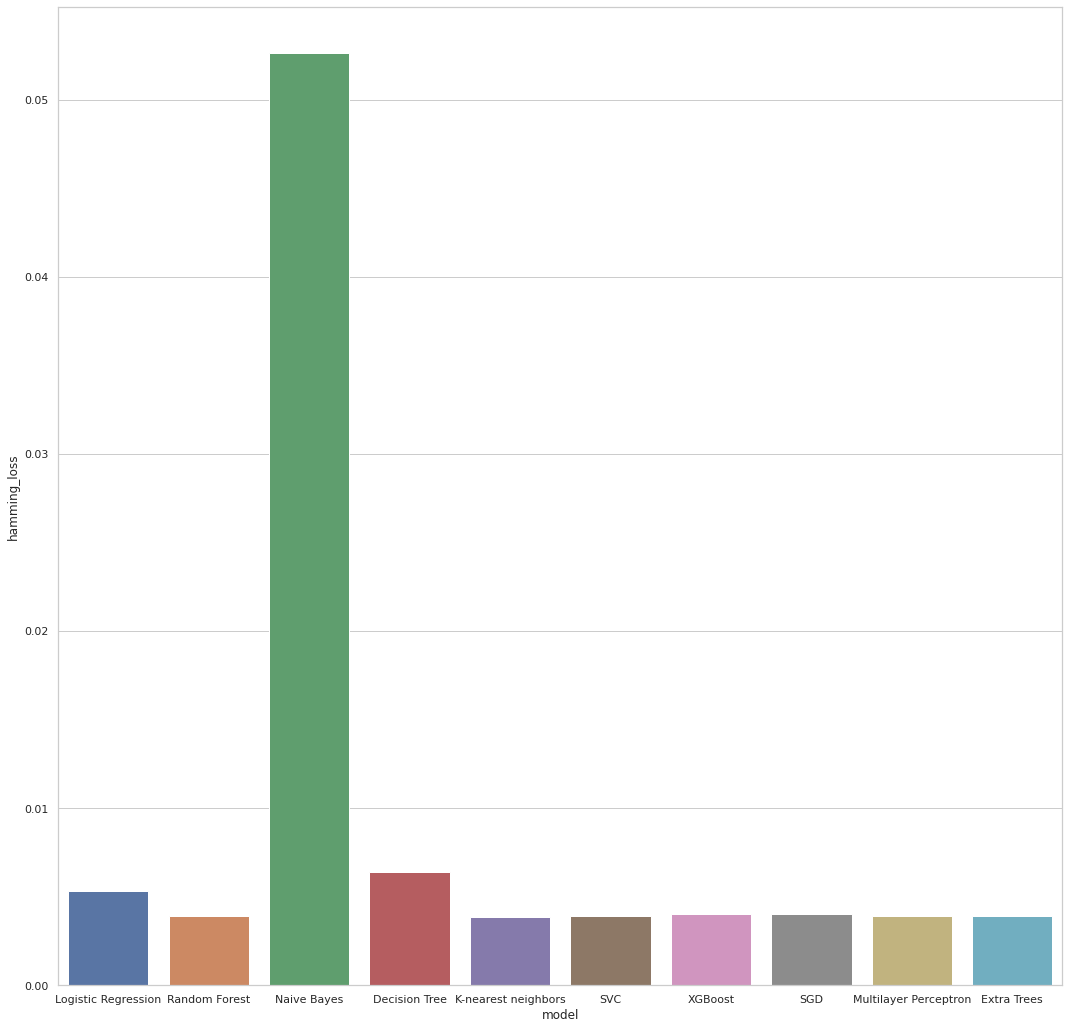

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18))

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="model", y="hamming_loss", data=df_econbiz)


plt.show()

In [ ]:
df_econbiz = pd.DataFrame({'model':['Logistic Regression','Random Forest','Naive Bayes','Decision Tree','K-nearest neighbors','SVC','XGBoost','SGD','Multilayer Perceptron','Extra Trees','CNN','RNN'],
                           'f1-score':[0.1435949605949606,0.13143795093795094,0.22765363603789024,0.22568605250958196,0.20132683982683983,0.13054906204906205,0.20802713952713955,0.2615108225108225,0.22680303030303028,0.18514357864357867,0.3879999833918381,0.280546638175479],
                           # 'hamming_loss':[0.0053418482344102175,0.003929376408715252,0.05260706235912847,0.006371149511645379,0.0038617580766341095,0.003884297520661157,0.003996994740796394,0.004012021036814425,0.003891810668670173,0.003891810668670173]
                          })
df_econbiz

,model,f1-score
0,Logistic Regression,0.143595
1,Random Forest,0.131438
2,Naive Bayes,0.227654
3,Decision Tree,0.225686
4,K-nearest neighbors,0.201327
5,SVC,0.130549
6,XGBoost,0.208027
7,SGD,0.261511
8,Multilayer Perceptron,0.226803
9,Extra Trees,0.185144


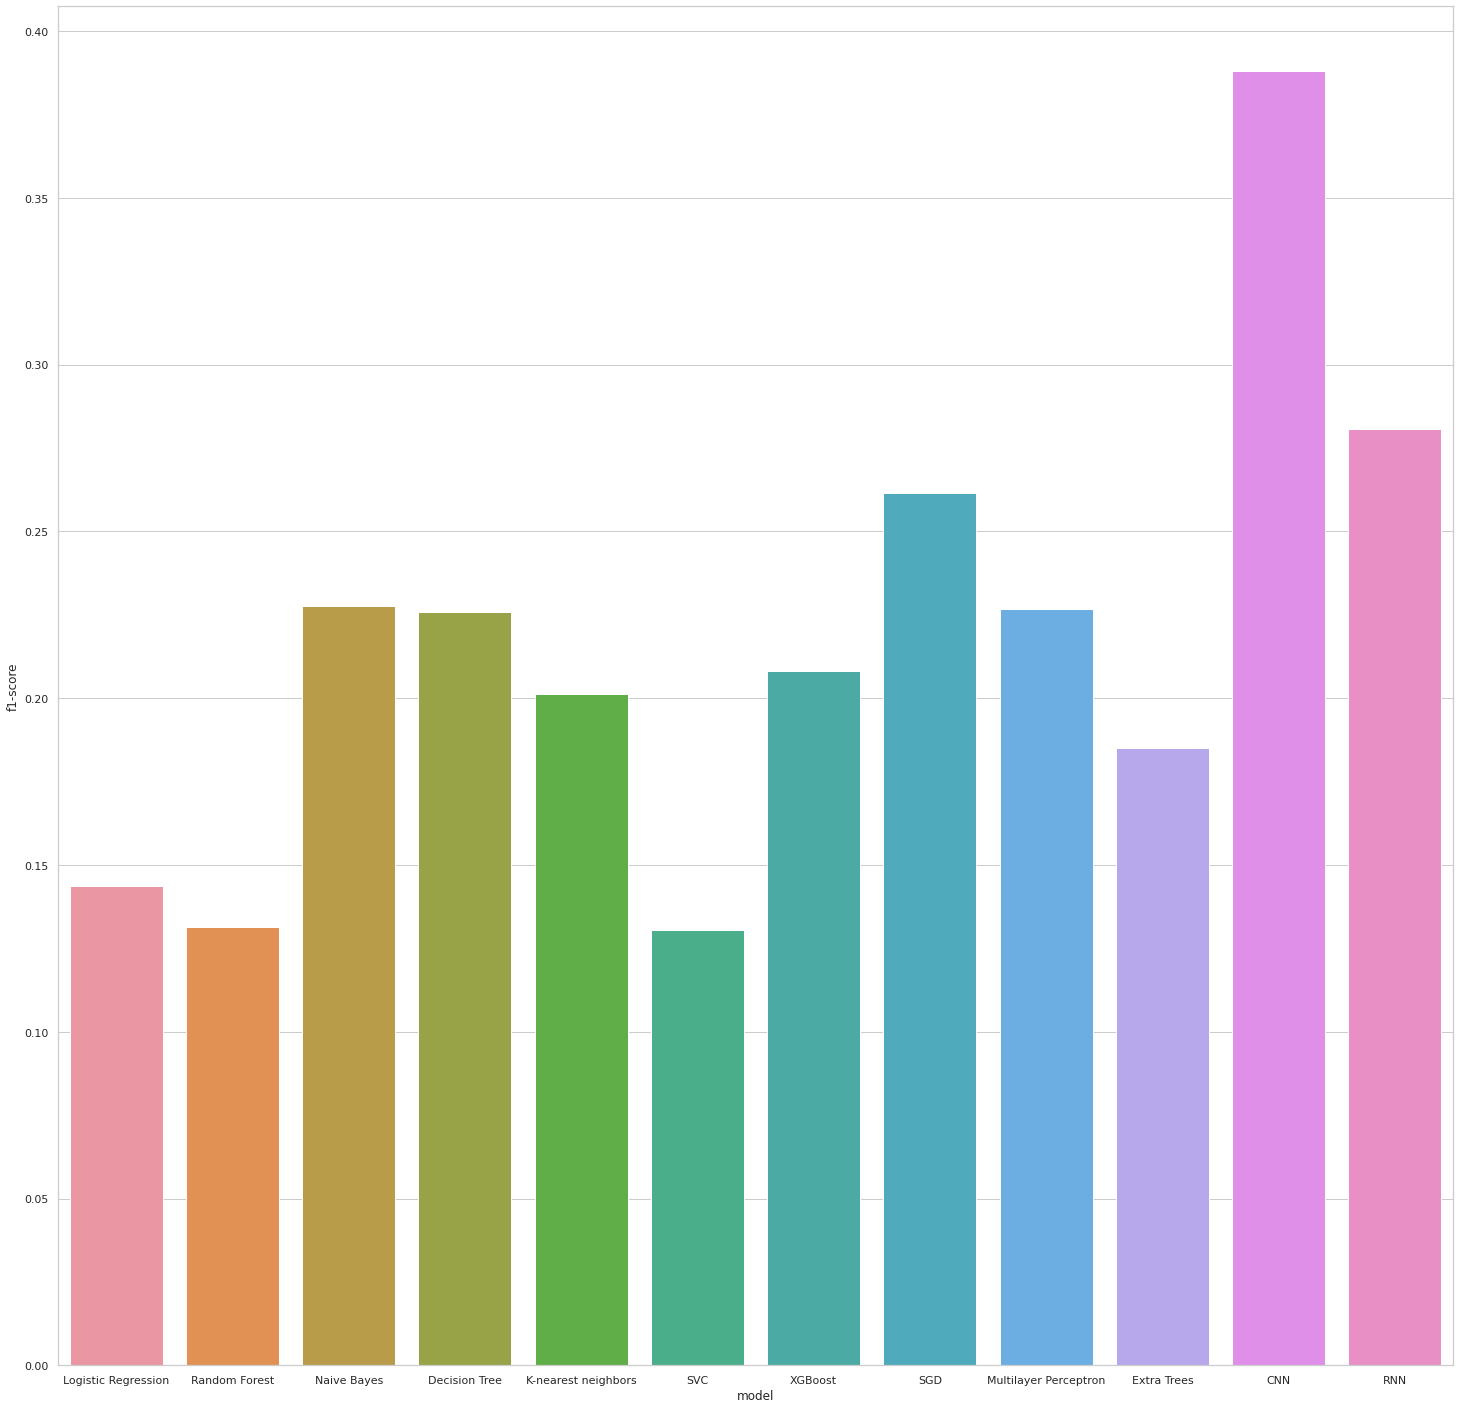

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="model", y="f1-score", data=df_econbiz)


plt.show()

In [ ]:
df_pebmed = pd.DataFrame({'model':['Logistic Regression','Random Forest','Naive Bayes','Decision Tree','K-nearest neighbors','SVC','XGBoost','SGD','Multilayer Perceptron','Extra Trees'],
                           'hamming_loss':[0.00967438494934877,0.005786300048239267,0.007158707187650748,0.008919440424505548,0.005921369995176074,0.005885190545103714,0.0058972503617945,0.005877954655089243,0.00535208095323,0.018336314847942754]
                          })
df_pebmed

,model,hamming_loss
0,Logistic Regression,0.009674
1,Random Forest,0.005786
2,Naive Bayes,0.007159
3,Decision Tree,0.008919
4,K-nearest neighbors,0.005921
5,SVC,0.005885
6,XGBoost,0.005897
7,SGD,0.005878
8,Multilayer Perceptron,0.005352
9,Extra Trees,0.018336


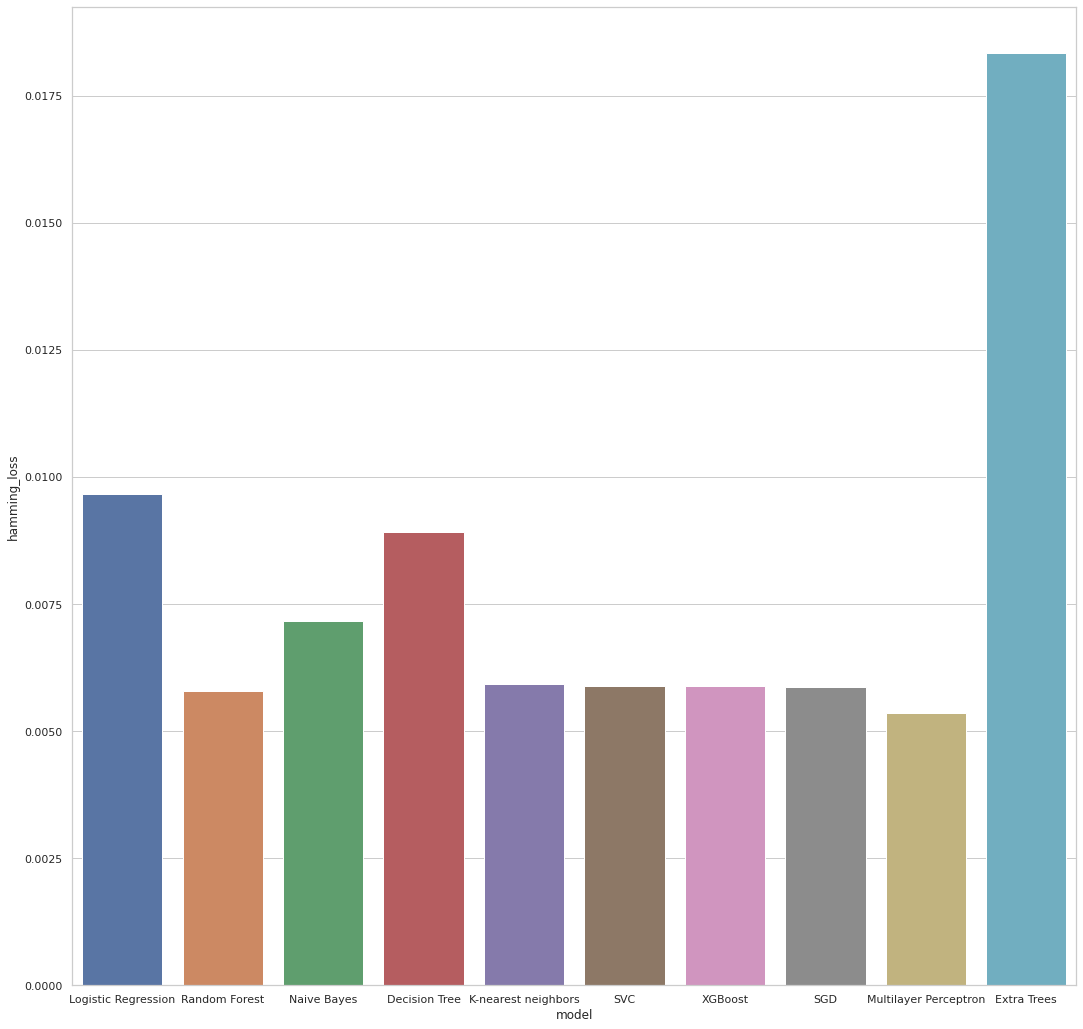

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18))

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="model", y="hamming_loss", data=df_pebmed)


plt.show()

In [ ]:
df_pebmed = pd.DataFrame({'model':['Logistic Regression','Random Forest','Naive Bayes','Decision Tree','K-nearest neighbors','SVC','XGBoost','SGD','Multilayer Perceptron','Extra Trees','CNN','RNN'],
                           'f1_score':[0.20848,0.13176,0.24078,0.23959,0.18836,0.07930,0.20349,0.23466,0.22824,0.03451,0.22954,0.17925],
                          })
df_pebmed

,model,f1_score
0,Logistic Regression,0.20848
1,Random Forest,0.13176
2,Naive Bayes,0.24078
3,Decision Tree,0.23959
4,K-nearest neighbors,0.18836
5,SVC,0.07930
6,XGBoost,0.20349
7,SGD,0.23466
8,Multilayer Perceptron,0.22824
9,Extra Trees,0.03451


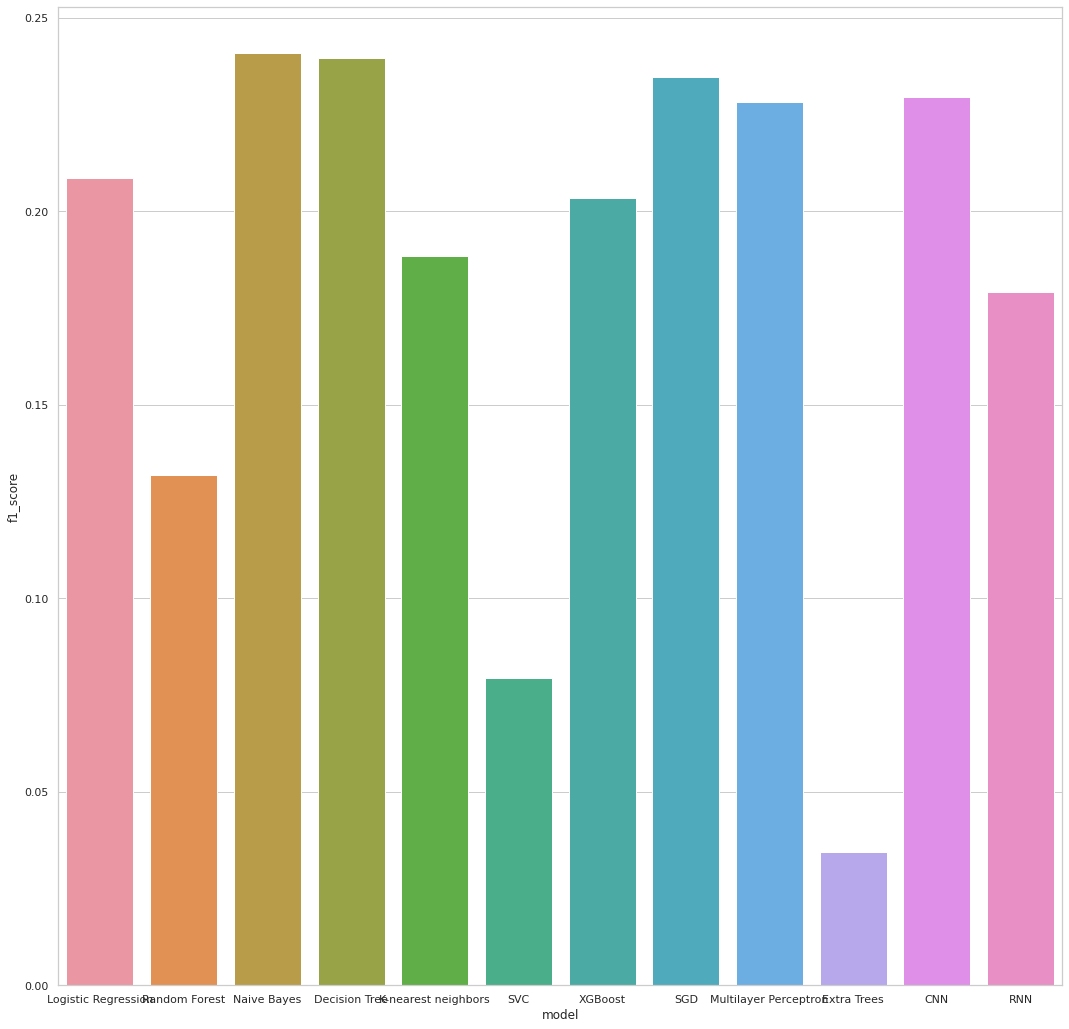

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18))

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="model", y="f1_score", data=df_pebmed)


plt.show()